# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Mistrali

Student name: Simone
    
ID: 2021119

In [1]:
#load the required packages

%matplotlib inline  


import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2021119
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [61 58 56 55 58 46 63 76 60 67]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


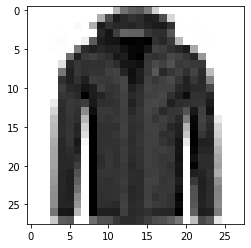

LABEL: 4
INPUT:


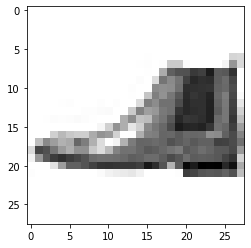

LABEL: 9
INPUT:


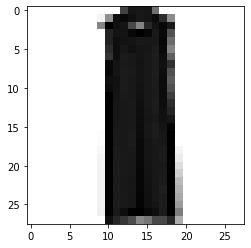

LABEL: 3
INPUT:


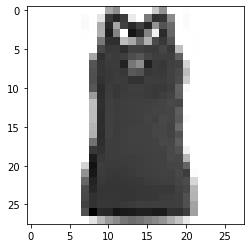

LABEL: 0


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV
import pandas as pd

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM

lin = SVC(kernel="linear")
clf = GridSearchCV(lin, parameters,cv=4)

clf.fit(X=X_train, y=y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(clf.best_params_)
print("Score with best parameters:")
print(clf.best_score_)

print("\n All scores on the grid:")
df_res = pd.DataFrame(clf.cv_results_)
df_res[['param_C','mean_test_score']]

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.1}
Score with best parameters:
0.7766666666666666

 All scores on the grid:


,param_C,mean_test_score
0,0.001,0.573333
1,0.01,0.748333
2,0.1,0.776667
3,1,0.758333
4,10,0.758333
5,100,0.758333


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

lin = SVC(kernel="poly",degree=2)
clf = GridSearchCV(lin, parameters,cv=4)

clf.fit(X=X_train, y=y_train)


print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(clf.best_params_)
print("Score with best parameters:")
print(clf.best_score_)

print("\n All scores on the grid:")
df_res = pd.DataFrame(clf.cv_results_)
df_res[['param_C','mean_test_score']]

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.05, 'gamma': 0.5}
Score with best parameters:
0.755

 All scores on the grid:


,param_C,mean_test_score
0,0.05,0.733333
1,0.05,0.755000
2,0.05,0.755000
3,0.5,0.748333
4,0.5,0.755000
5,0.5,0.755000
6,5,0.755000
7,5,0.755000
8,5,0.755000


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4


lin = SVC(kernel="poly",degree=degree)
clf = GridSearchCV(lin, parameters,cv=4)
clf.fit(X=X_train,y=y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(clf.best_params_)
print("Score with best parameters:")
print(clf.best_score_)

print("\n All scores on the grid:")
df_res = pd.DataFrame(clf.cv_results_)
df_res[['param_C','mean_test_score']]


RESULTS FOR POLY DEGREE= 4  KERNEL
Best parameters set found:
{'C': 0.5, 'gamma': 0.05}
Score with best parameters:
0.71

 All scores on the grid:


,param_C,mean_test_score
0,0.05,0.680
1,0.05,0.705
2,0.05,0.705
3,0.5,0.710
4,0.5,0.705
5,0.5,0.705
6,5,0.705
7,5,0.705
8,5,0.705


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

lin = SVC(kernel="rbf")
clf = GridSearchCV(lin, parameters,cv=4)
clf.fit(X=X_train,y=y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(clf.best_params_)
bestpar=clf.best_params_
print("Score with best parameters:")
print(clf.best_score_)

print("\n All scores on the grid:")
df_res = pd.DataFrame(clf.cv_results_)
df_res[['param_C','mean_test_score']]

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 5, 'gamma': 0.005}
Score with best parameters:
0.8016666666666667

 All scores on the grid:


,param_C,mean_test_score
0,0.5,0.723333
1,0.5,0.670000
2,0.5,0.126667
3,0.5,0.126667
4,5,0.801667
5,5,0.743333
6,5,0.126667
7,5,0.126667
8,50,0.783333
9,50,0.743333


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

The score of the RBF kernel is the greater, because this is the most powerful kernel of the four used. The score of the linear is the best of the "polinomial" kernel (linear is a polinomial with degree one).  

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV

blin = SVC(kernel="rbf")
blin.set_params(C=bestpar["C"],gamma=bestpar["gamma"])
blin.fit(X=X_train,y=y_train)

training_error = 1-blin.score(X_train,y_train)
# (error is 1 - svm.score)
test_error = 1-blin.score(X_test,y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.050000
Best SVM test error: 0.195000


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [13]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test, train_error, test_error):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],train_error))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],test_error))
    
    plt.show()

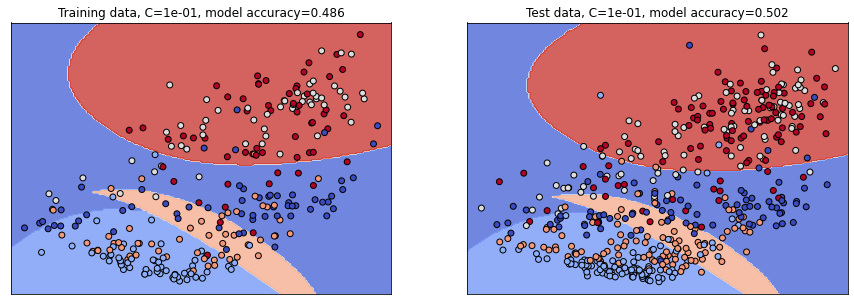

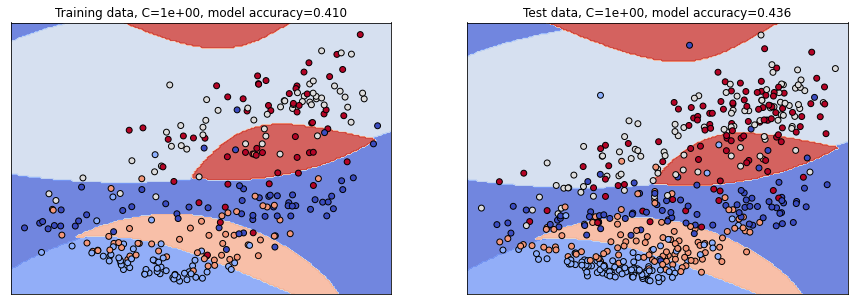

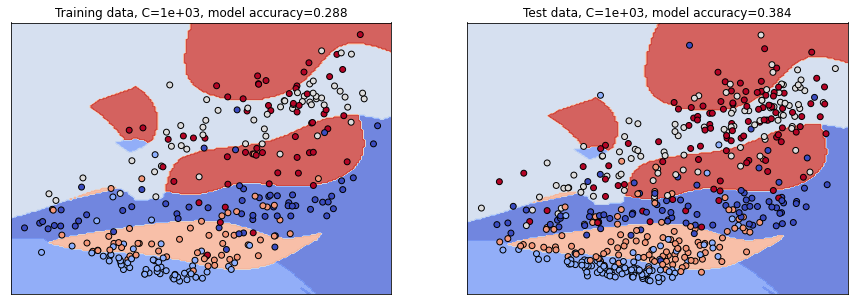

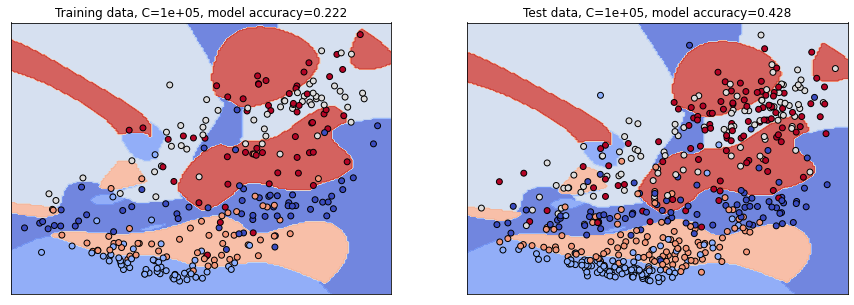

In [14]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    
    my_svm = SVC(kernel="rbf",C=C,gamma=gamma)
    my_svm.fit(X=X_train_pca,y=y_train_plot)
    train_error = 1- my_svm.score(X_train_pca,y_train_plot)
    test_error = 1-my_svm.score(X_test_pca,y_test_plot)
    
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot,train_error, test_error)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

If the C increase the shape fit better and better the shape of our data, increasing the risk of overfitting. In the final plot the data are overfitted.

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [15]:
#Test with different values of gamma

# Set gamma valuesy_train
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


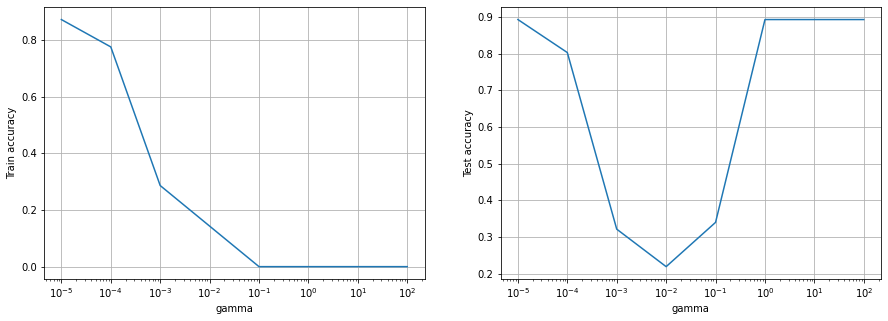

In [16]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
for ga in gamma_values:
    my_svm = SVC(kernel="rbf",C=1.0,gamma=ga)
    my_svm.fit(X=X_train,y=y_train)
    train_acc_list.append(1-my_svm.score(X_train,y_train))
    test_acc_list.append(1-my_svm.score(X_test,y_test))
# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.


The training error decrease when $\gamma$ increase and drop to zero for $\gamma=10^{-1}$, on the other hand the test error decrease and have a minima for $\gamma=10^{-2}$. After that minima it begins to increase and in the end it saturate to $0.9$, because the SVM for high $\gamma$ values overfit the training set, and becames a "bad predictor" for the others. The best $\gamma$ value (in this case) is $10^{-2}$, because it minimize the test error. 

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [17]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [148 170 136 147 151 153 151 134 145 165]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [18]:
#get training and test error for the best SVM model from CV
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}
lin = SVC(kernel="rbf")
clf = GridSearchCV(lin, parameters,cv=4)
clf.fit(X=X_train,y=y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(clf.best_params_)
print("Score with best parameters:")
print(clf.best_score_)
bestparb=clf.best_params_
print("\n All scores on the grid:")
df_res = pd.DataFrame(clf.cv_results_)
df_res['mean_test_score']
training_error = 1 - clf.best_score_
test_error     = 1-clf.score(X_test,y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 5, 'gamma': 0.005}
Score with best parameters:
0.84

 All scores on the grid:
Best SVM training error: 0.160000
Best SVM test error: 0.175624


In [19]:
best_SVM = SVC(kernel="rbf",C=bestpar["C"],gamma=bestpar["gamma"])
best_SVM.fit(X=X_train,y=y_train)

print ('RESULTS FOR rbf KERNEL')

# print("Best parameters set found:")
# print(clf.best_params_)
# print("Score with best parameters:")
# print(clf.best_score_)

print("\n All scores on the grid:")
training_error = 1 - best_SVM.score(X_train,y_train)
test_error     = 1 - best_SVM.score(X_test,y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

RESULTS FOR rbf KERNEL

 All scores on the grid:
Best SVM training error: 0.056000
Best SVM test error: 0.175624


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [20]:
from sklearn import linear_model

ln = linear_model.LogisticRegression(C=1e6,max_iter=10000)

ln.fit(X_train,y_train)

training_error = 1-ln.score(X_train,y_train)
test_error = 1- ln.score(X_test,y_test)
print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.217692


## TO DO 10 Try  with regularization (use C=1)¶

In [21]:
ln = linear_model.LogisticRegression(C=1.,max_iter=10000)

ln.fit(X_train,y_train)

training_error = 1-ln.score(X_train,y_train)
test_error = 1- ln.score(X_test,y_test)
print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.006667
Best regularized logistic regression test error: 0.193607


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.


The SVM with the rbf kernel with $m=600$ has the best test error equal $0.195$, and the computational time is about $2.10 s$, while with $m=1500$ the test error is $0.175$, but the computational time is significantly increased because is about $49.0 s$. If the $m$ increase the time increase and the test error decrease, as we expect from the theory.


- the results of SVM and of Logistic Regression

The computational time of the LR is smaller than the SVM ($\approx 3.15s$ with regularization and $\approx 1 s$ without), without regularization the LR overfit the data, because the training error is zero. On the other hand the SVM has an error smaller than the other two, but the the computational time is much larger ($\approx 49 s$).

## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

Clothing missclassified by the logistic regression and correctly classified by SVM :  3169  over  58500  tested.
logistic regression prediction = 6
SVM prediction = 0
INPUT:


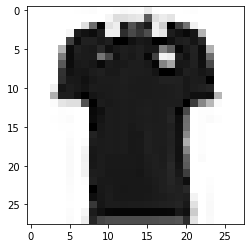

LABEL: 0


In [22]:
LR_pred= ln.predict(X_test) 
SVM_pred = best_SVM.predict(X_test)  

error = []
for i in range(len(y_test)):
    if (SVM_pred[i] == y_test[i]) and (LR_pred[i] != y_test[i]):
        error.append(i)
# Take a random miscalssified sample
h = error[np.random.randint(0, len(error))]
print("Clothing missclassified by the logistic regression and correctly classified by SVM : ",len(error)," over ",len(y_test), " tested.")
print("logistic regression prediction =", LR_pred[h])
print("SVM prediction =", SVM_pred[h])
plot_input(X_test,y_test,h)

## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [23]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test,SVM_pred)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = skm.confusion_matrix(y_test,LR_pred)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5852 5830 5864 5853 5849 5847 5849 5866 5855 5835]

 Confusion matrix SVM  
 
 [[4859   18   73  273   21    7  537    0   63    1]
 [  70 5501   78  148   12    0   18    0    2    1]
 [ 105    9 4054   44  913    5  710    0   24    0]
 [ 364   71   51 4981  197    0  178    0   11    0]
 [  25   11  502  283 4428    4  582    0   13    1]
 [  12    0    2    3    0 5357    1  264   41  167]
 [1196   13  652  147  593    3 3162    0   82    1]
 [   1    0    0    0    0  483    0 5079   10  293]
 [  19    6   66   81   25   55  113   22 5461    7]
 [   1    0    2    1    0  112    0  368    7 5344]]

 Confusion matrix SVM (normalized)   
 
 [[0.83 0.   0.01 0.05 0.   0.   0.09 0.   0.01 0.  ]
 [0.01 0.94 0.01 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.69 0.01 0.16 0.   0.12 0.   0.   0.  ]
 [0.06 0.01 0.01 0.85 0.03 0.   0.03 0.   0.   0.  ]
 [0.   0.   0.09 0.05 0.76 0.   0.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.92 0.   0.05 0.0

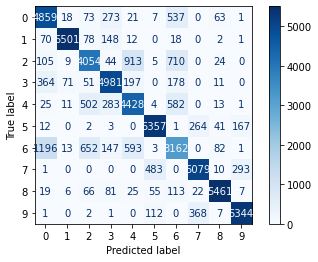

In [24]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
disp = skm.plot_confusion_matrix(best_SVM, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

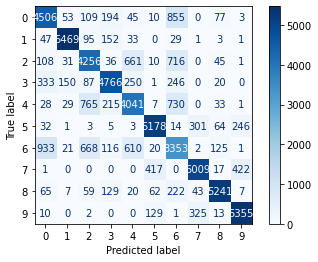

In [25]:
disp = skm.plot_confusion_matrix(ln, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

In [26]:
# Normalized matrix
import sklearn.preprocessing as skp 
print("\n Confusion matrix SVM Normalized  \n \n",skp.normalize(confusion_SVM, axis=1, norm='l2'))
confusion_LR = skm.confusion_matrix(y_test, LR_pred)### ADD CODE
### ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR Normalized  \n \n" ,skp.normalize(confusion_LR, axis=1, norm='l2'))


 Confusion matrix SVM Normalized  
 
 [[0.99 0.   0.01 0.06 0.   0.   0.11 0.   0.01 0.  ]
 [0.01 1.   0.01 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.96 0.01 0.22 0.   0.17 0.   0.01 0.  ]
 [0.07 0.01 0.01 1.   0.04 0.   0.04 0.   0.   0.  ]
 [0.01 0.   0.11 0.06 0.98 0.   0.13 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.05 0.01 0.03]
 [0.34 0.   0.19 0.04 0.17 0.   0.9  0.   0.02 0.  ]
 [0.   0.   0.   0.   0.   0.09 0.   0.99 0.   0.06]
 [0.   0.   0.01 0.01 0.   0.01 0.02 0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.02 0.   0.07 0.   1.  ]]

 Confusion matrix LR  
 
 [[4506   53  109  194   45   10  855    0   77    3]
 [  47 5469   95  152   33    0   29    1    3    1]
 [ 108   31 4256   36  661   10  716    0   45    1]
 [ 333  150   87 4766  250    1  246    0   20    0]
 [  28   29  765  215 4041    7  730    0   33    1]
 [  32    1    3    5    3 5178   14  301   64  246]
 [ 933   21  668  116  610   20 3353    2  125    1]
 [   1    0    0    0    0  417 

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


Probably the classes with low accuracies are the classes like `Pullover` and `Shirt`, which are similar and for the computer is difficult to discern it.